# ABCD Method for estimating the Z-QCD correction factors.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
print("Adding the following path to sys.path:", os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd())) # Needed to load all the modules in the parent directory
from histogramHelpers import biner,ratioDataMinusBG
from AnalysisCommons.Run import INFO, WARNING, ERROR, DEBUG, Logger
Logger.LOGLEVEL = 3 # Set the log level to DEBUG

Adding the following path to sys.path: /Users/user/Documents/HEP/VBF-Analysis


## Test if EWjj model makes a difference in CRs

INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]


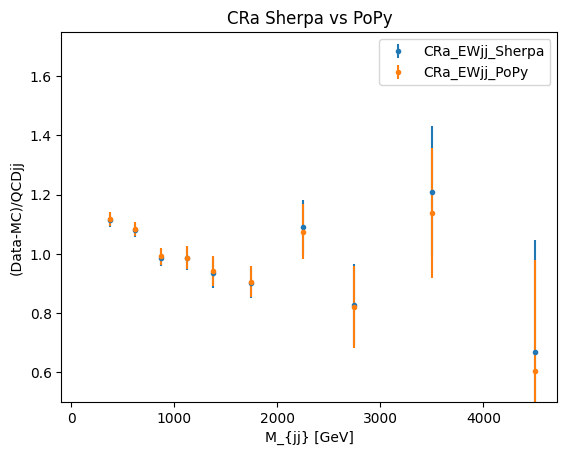

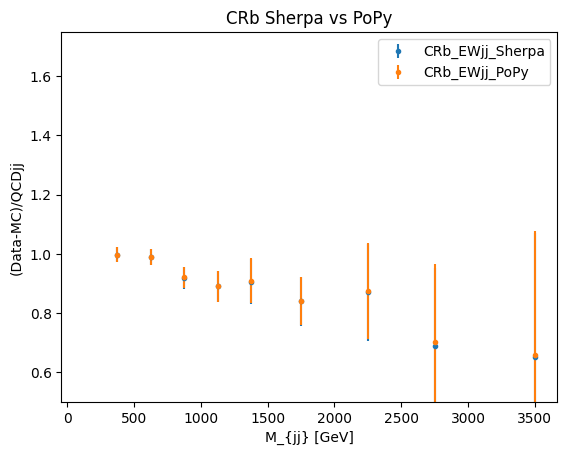

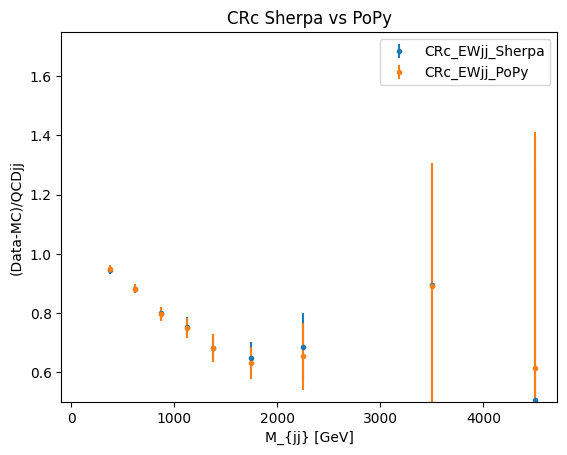

In [2]:
root_path = '/Users/user/Documents/HEP/VBF-Analysis/VBFAnalysisPlots/Zll/Z-peak/'
path_CRa = root_path+"CRa"
path_CRb = root_path+"CRb"
path_CRc = root_path+"CRc"
signal = "Zll_SherpaNLO"

histo={
"mass_jj":[[1500,3000],[250,500,1000],250],
}

scaleFactors = {"Signal_Sherpa":1.0,"Signal_PoPy":1.0}

# Sherpa for EWjj
EWjjSample = "Signal_Sherpa"
bg_samples = [EWjjSample,"VV","Wjets","ttbar","singletop"]
CRa_axis,CRa_y,CRa_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb_axis,CRb_y,CRb_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc_axis,CRc_y,CRc_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)

# Powheg+Pythia for EWjj + scaling
EWjjSample = "Signal_PoPy"
bg_samples = [EWjjSample,"VV","Wjets","ttbar","singletop"]
CRa2_axis,CRa2_y,CRa2_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb2_axis,CRb2_y,CRb2_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc2_axis,CRc2_y,CRc2_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)


# Plot CRa
plt.errorbar(CRa_axis,CRa_y,yerr=CRa_error,fmt='.')
plt.errorbar(CRa2_axis,CRa2_y,yerr=CRa2_error,fmt='.')
plt.legend(['CRa_EWjj_Sherpa','CRa_EWjj_PoPy'])
plt.xlabel('M_{jj} [GeV]')
plt.ylabel('(Data-MC)/QCDjj')
plt.title('CRa Sherpa vs PoPy')
plt.ylim(0.5,1.75)
plt.show()
# Plot CRb
plt.errorbar(CRb_axis,CRb_y,yerr=CRb_error,fmt='.')
plt.errorbar(CRb2_axis,CRb2_y,yerr=CRb2_error,fmt='.')
plt.legend(['CRb_EWjj_Sherpa','CRb_EWjj_PoPy'])
plt.xlabel('M_{jj} [GeV]')
plt.ylabel('(Data-MC)/QCDjj')
plt.title('CRb Sherpa vs PoPy')
plt.ylim(0.5,1.75)
plt.show()
# Plot CRc
plt.errorbar(CRc_axis,CRc_y,yerr=CRc_error,fmt='.')
plt.errorbar(CRc2_axis,CRc2_y,yerr=CRc2_error,fmt='.')
plt.legend(['CRc_EWjj_Sherpa','CRc_EWjj_PoPy'])
plt.xlabel('M_{jj} [GeV]')
plt.ylabel('(Data-MC)/QCDjj')
plt.title('CRc Sherpa vs PoPy')
plt.ylim(0.5,1.75)
plt.show()

## Using mid point in the bins for the fit

In [3]:
print('X axis being used for CRa:', CRa_axis[1:], 'GeV')
print('X axis being used for CRb:', CRb_axis[1:], 'GeV')
print('X axis being used for CRc:', CRc_axis[1:], 'GeV')

X axis being used for CRa: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV
X axis being used for CRb: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500.] GeV
X axis being used for CRc: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV


## Fits in the CRs

In [4]:
from MjjFit import linear_model, parabolic_model, mjj_fit_experiment, FitExperimentContainer

experiments = FitExperimentContainer()

# Sherpa for EWjj
CRa_fit_line, CRa_cov_line = mjj_fit_experiment(linear_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name="CRa_EWjjSherpa_QCDjjSherpa_linear", experiments_container=experiments)
CRa_fit, CRa_cov = mjj_fit_experiment(parabolic_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name="CRa_EWjjSherpa_QCDjjSherpa_parabolic", experiments_container=experiments)
CRb_fit, CRb_cov = mjj_fit_experiment(parabolic_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name="CRb_EWjjSherpa_QCDjjSherpa_parabolic", experiments_container=experiments)
CRc_fit, CRc_cov = mjj_fit_experiment(parabolic_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name="CRc_EWjjSherpa_QCDjjSherpa_parabolic", experiments_container=experiments)

# Powheg+Pythia for EWjj + scaling
CRa2_fit, CRa2_cov = mjj_fit_experiment(parabolic_model, CRa2_axis[1:], CRa2_y[1:], CRa2_error[1:], experiment_name="CRa_EWjjPoPy_QCDjjSherpa_parabolic", experiments_container=experiments)
CRb2_fit, CRb2_cov = mjj_fit_experiment(parabolic_model, CRb2_axis[1:], CRb2_y[1:], CRb2_error[1:], experiment_name="CRb_EWjjPoPy_QCDjjSherpa_parabolic", experiments_container=experiments)
CRc2_fit, CRc2_cov = mjj_fit_experiment(parabolic_model, CRc2_axis[1:], CRc2_y[1:], CRc2_error[1:], experiment_name="CRc_EWjjPoPy_QCDjjSherpa_parabolic", experiments_container=experiments)
x = CRa_axis


INFO: Adding new experiment CRa_EWjjSherpa_QCDjjSherpa_linear. 
INFO: Adding new experiment CRa_EWjjSherpa_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRa_EWjjPoPy_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRb_EWjjPoPy_QCDjjSherpa_parabolic. 
INFO: Adding new experiment CRc_EWjjPoPy_QCDjjSherpa_parabolic. 


INFO: Displaying the figure without saving. 


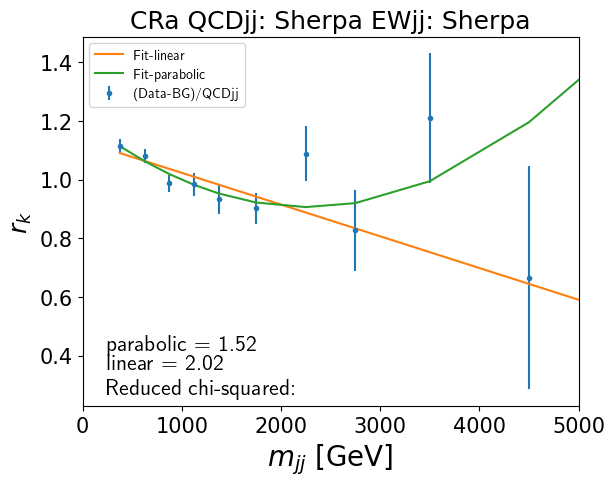

In [5]:
from MjjFit import display_fit_experiments
display_fit_experiments(experiments, "CRa", ["CRa_EWjjSherpa_QCDjjSherpa_linear", "CRa_EWjjSherpa_QCDjjSherpa_parabolic"])

INFO: Displaying the figure without saving. 


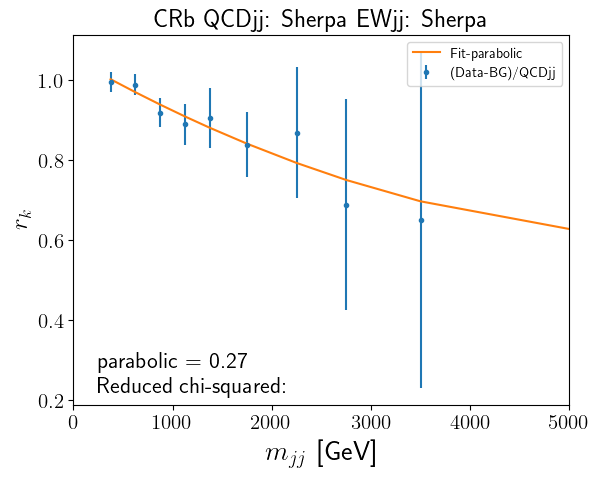

In [6]:
display_fit_experiments(experiments, "CRb", ["CRb_EWjjSherpa_QCDjjSherpa_parabolic"])

INFO: Displaying the figure without saving. 


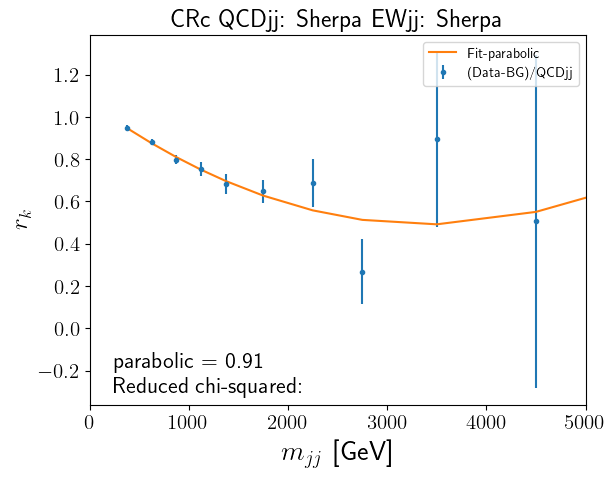

In [7]:
display_fit_experiments(experiments, "CRc", ["CRc_EWjjSherpa_QCDjjSherpa_parabolic"])

## Plot ratios of shapes between CRs

In [ ]:
x=np.linspace(250,5000,100)

parabolic_shape = parabolic_model

r_ab=parabolic_shape(x,CRa_fit[0],CRa_fit[1],CRa_fit[2])/parabolic_shape(x,CRb_fit[0],CRb_fit[1],CRb_fit[2])
r_ab_error=r_ab*np.sqrt((model_uncern(CRa_cov,x)/parabolic_shape(x,CRa_fit[0],CRa_fit[1],CRa_fit[2]))**2
                        +(model_uncern(CRb_cov,x)/parabolic_shape(x,CRb_fit[0],CRb_fit[1],CRb_fit[2])**2))

r_ac=parabolic_shape(x,CRa_fit[0],CRa_fit[1],CRa_fit[2])/parabolic_shape(x,CRc_fit[0],CRc_fit[1],CRc_fit[2])
r_ac_error=r_ac*np.sqrt((model_uncern(CRa_cov,x)/parabolic_shape(x,CRa_fit[0],CRa_fit[1],CRa_fit[2]))**2
                        +(model_uncern(CRc_cov,x)/parabolic_shape(x,CRc_fit[0],CRc_fit[1],CRc_fit[2])**2))

r_bc=parabolic_shape(x,CRb_fit[0],CRb_fit[1],CRb_fit[2])/parabolic_shape(x,CRc_fit[0],CRc_fit[1],CRc_fit[2])
r_bc_error=r_bc*np.sqrt((model_uncern(CRb_cov,x)/parabolic_shape(x,CRb_fit[0],CRb_fit[1],CRb_fit[2]))**2
                        +(model_uncern(CRc_cov,x)/parabolic_shape(x,CRc_fit[0],CRc_fit[1],CRc_fit[2])**2))



plt.plot(x,r_ab)
plt.plot(x,r_ac)
plt.plot(x,r_bc)
plt.legend(["A/B","A/C","B/C"])
plt.ylim(0,3)


print(r_ac.max()-r_ac.min())
print(r_bc.max()-r_bc.min())

## Do the SR predictions

In [8]:
from MjjFit import FitExperiment, parabolic_cutoff_model
import numpy as np

parabolic_experiment = experiments.get_experiment("CRa_EWjjSherpa_QCDjjSherpa_parabolic")
experiment = FitExperiment(
    name = "CRa_EWjjSherpa_QCDjjSherpa_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = np.append(parabolic_experiment.fit_parameters, [2750, 1.34]),
    fit_covariance = [np.array(parabolic_experiment.fit_covariance), 2750, 0.9],
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

parabolic_experiment = experiments.get_experiment("CRb_EWjjSherpa_QCDjjSherpa_parabolic")
experiment = FitExperiment(
    name = "CRb_EWjjSherpa_QCDjjSherpa_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = np.append(parabolic_experiment.fit_parameters, [2250, 0.882]),
    fit_covariance = [np.array(parabolic_experiment.fit_covariance), 2250, 0.45],
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

parabolic_experiment = experiments.get_experiment("CRc_EWjjSherpa_QCDjjSherpa_parabolic")
experiment = FitExperiment(
    name = "CRc_EWjjSherpa_QCDjjSherpa_parabolic-cutoff",
    model = parabolic_cutoff_model,
    fit_parameters = np.append(parabolic_experiment.fit_parameters, [2250, 0.947]),
    fit_covariance = [np.array(parabolic_experiment.fit_covariance), 2250, 0.8],
    x = parabolic_experiment.x,
    y = parabolic_experiment.y,
    y_uncer = parabolic_experiment.y_uncer,
)
experiments.add_experiment(experiment)

In [9]:
experiments.print_experiments()
from MjjFit import predict_SR_from_experiments
SR_y, SR_error = predict_SR_from_experiments(experiments, experiment_type = "EWjjSherpa_QCDjjSherpa_parabolic-cutoff", x_axis = parabolic_experiment.x)
SR2_y, SR2_error = predict_SR_from_experiments(experiments, experiment_type = "EWjjSherpa_QCDjjSherpa_parabolic", x_axis = parabolic_experiment.x)

INFO: Experiment Name: CRa_EWjjSherpa_QCDjjSherpa_linear
 Model: <function linear_model at 0x3271296c0>
 Model_E: <function linear_model_uncertainty at 0x327129d00>
 Parameters: [-1.08165544e-04  1.13151071e+00]
 Parameters_E: [[ 1.18558204e-09 -9.69466302e-07]
 [-9.69466302e-07  1.08814529e-03]]
 Reduced Chi2: 2.0226856808783995 
INFO: Experiment Name: CRa_EWjjSherpa_QCDjjSherpa_parabolic
 Model: <function parabolic_model at 0x322a34ea0>
 Model_E: <function parabolic_model_uncertainty at 0x32712a2a0>
 Parameters: [ 5.80621697e-08 -2.63325912e-04  1.20509708e+00]
 Parameters_E: [[ 7.24089713e-16 -1.93499530e-12  9.17690975e-10]
 [-1.93499530e-12  5.98464434e-09 -3.11775561e-06]
 [ 9.17690975e-10 -3.11775561e-06  1.90990843e-03]]
 Reduced Chi2: 1.5228324795394421 
INFO: Experiment Name: CRb_EWjjSherpa_QCDjjSherpa_parabolic
 Model: <function parabolic_model at 0x322a34ea0>
 Model_E: <function parabolic_model_uncertainty at 0x32712a2a0>
 Parameters: [ 1.11439102e-08 -1.40853896e-04  1.053

INFO: Using point-by-point prediction mode. These are the axis of the CRs:  
INFO: CRa: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] 
INFO: CRb: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500.] 
INFO: CRc: [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] 
INFO: Found 9 valid elements in the CRs. Using them for the ABCD extrapolation 


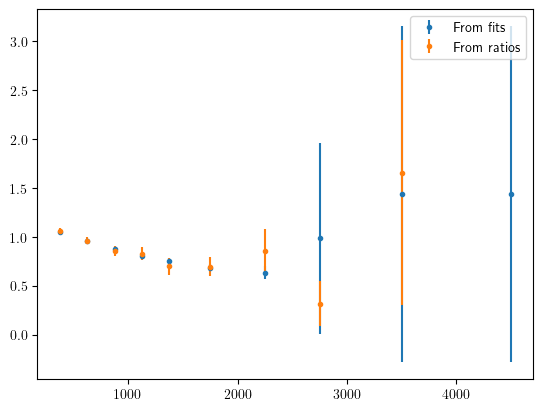

In [10]:
rk, rk_error = predict_SR_from_experiments(experiments, experiment_type = "EWjjSherpa_QCDjjSherpa_parabolic-cutoff", prediction_mode = 'point-by-point')
plt.errorbar(parabolic_experiment.x,SR_y,yerr=SR_error,fmt='.', label='From fits')
plt.errorbar(parabolic_experiment.x[:len(rk)],rk,yerr=rk_error,fmt='.', label='From ratios')
plt.legend()

Bins =  [ 375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.]
SF (SherpaEWjj) =  [np.float64(1.0535899167652694), np.float64(0.9595840466187369), np.float64(0.8786327356767709), np.float64(0.8099633836829772), np.float64(0.7528871585383238), np.float64(0.6877796136592574), np.float64(0.6373807079569951), np.float64(0.9878498201999573), np.float64(1.43875283446712), np.float64(1.43875283446712)]
SF error (SherpaEWjj) =  [np.float64(0.026490719547954716), np.float64(0.017989841137971738), np.float64(0.020625238585376002), np.float64(0.025737511744100917), np.float64(0.030346324133692842), np.float64(0.03898953703719097), np.float64(0.06523164665897258), np.float64(0.9777490689094122), np.float64(1.7175191531766607), np.float64(1.7175191531766607)]


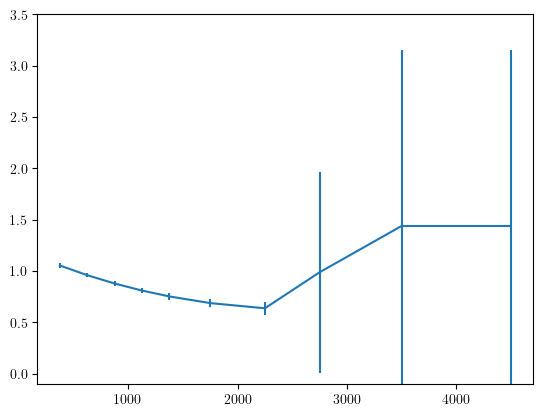

In [11]:
plt.errorbar(parabolic_experiment.x,SR_y,yerr=SR_error)
plt.ylim([-.1,3.5])

print("Bins = ",parabolic_experiment.x)
print("SF (SherpaEWjj) = ",list(SR_y))
print("SF error (SherpaEWjj) = ",list(SR_error))


INFO: Adding new experiment SR_EWjjSherpa_QCDjjSherpa_parabolic. 
INFO: Adding new experiment SR_EWjjPopy_QCDjjSherpa_parabolic. 
INFO: Displaying the figure without saving. 


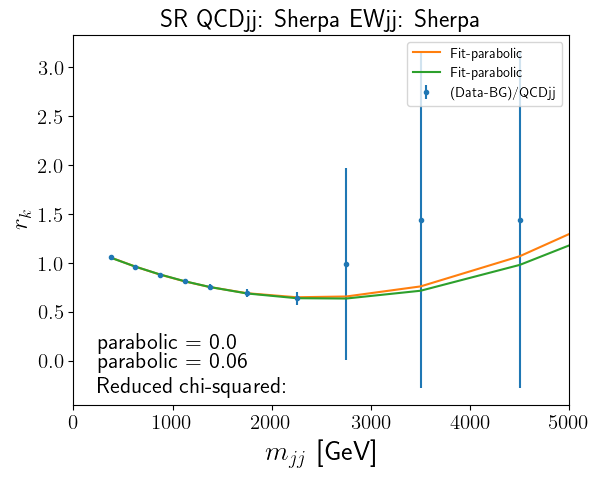

In [12]:

SR_fit, SR_cov = mjj_fit_experiment(parabolic_model, parabolic_experiment.x, SR_y, SR_error, experiment_name="SR_EWjjSherpa_QCDjjSherpa_parabolic", experiments_container=experiments)
SR2_fit, SR2_cov = mjj_fit_experiment(parabolic_model, parabolic_experiment.x, SR2_y, SR2_error, experiment_name="SR_EWjjPopy_QCDjjSherpa_parabolic", experiments_container=experiments)

display_fit_experiments(experiments, "SR", ["SR_EWjjSherpa_QCDjjSherpa_parabolic", "SR_EWjjPopy_QCDjjSherpa_parabolic"])

In [13]:
from MjjFit import convert_fit_result_to_dataframe

# Sherpa for EWjj
print("Sherpa for EWjj")
print("Parameters ",SR_fit)
print("Covariance Matrix",SR_cov)
print(convert_fit_result_to_dataframe(SR_fit,SR_cov,['a','b','c']))
print("\n")

# Powheg+Pythia for EWjj + scaling
print("Powheg+Pythia for EWjj + scaling")
print("Parameters ",SR2_fit)
print("Covariance Matrix",SR2_cov)
print(convert_fit_result_to_dataframe(SR2_fit,SR2_cov,['a','b','c']))

convert_fit_result_to_dataframe(SR_fit,SR_cov,['a','b','c'])

Sherpa for EWjj
Parameters  [ 9.78006438e-08 -4.73677341e-04  1.21788906e+00]
Covariance Matrix [[ 7.51965711e-17 -1.70049799e-13  7.88720309e-11]
 [-1.70049799e-13  4.11276904e-10 -2.02619234e-07]
 [ 7.88720309e-11 -2.02619234e-07  1.09551706e-04]]
              a       Sigma a         b  Sigma b         c   Sigma c
0  9.780064e-08  8.671596e-09 -0.000474  0.00002  1.217889  0.010467


Powheg+Pythia for EWjj + scaling
Parameters  [ 9.03190352e-08 -4.58254847e-04  1.21127728e+00]
Covariance Matrix [[ 1.58560129e-18 -3.98165782e-15  1.99004646e-12]
 [-3.98165782e-15  1.10723704e-11 -5.98936311e-09]
 [ 1.99004646e-12 -5.98936311e-09  3.64110958e-06]]
              a       Sigma a         b   Sigma b         c   Sigma c
0  9.031904e-08  1.259207e-09 -0.000458  0.000003  1.211277  0.001908


,a,Sigma a,b,Sigma b,c,Sigma c
0,9.780064e-08,8.671596e-09,-0.000474,0.00002,1.217889,0.010467


In [ ]:
difference=100*(parabolic_shape(X,SR_fit[0],SR_fit[1],SR_fit[2])-parabolic_shape(X,SR2_fit[0],SR2_fit[1],SR2_fit[2]))/parabolic_shape(X,SR_fit[0],SR_fit[1],SR_fit[2])
plt.ylim([-8,8])
plt.plot(X,difference,label='(Sherpa - PoPy)/Sherpa')
plt.legend()
plt.xlabel(r'$m_{jj}$ GeV',fontsize=22)
plt.ylabel(r'$r_{k}$',fontsize=18)
plt.xlim(0,5000)
plt.title("SR "+signal[4:],fontsize=18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig("SR "+signal+'.pdf',bbox_inches='tight')